# IMAGE CLASSIFICATION

## Training Model

### Step 1: Importing all the necessary libraries 

In [4]:
pip install -r requirements.txt --user

  Using cached absl_py-1.2.0-py3-none-any.whl (123 kB)
  Using cached asttokens-2.0.8-py2.py3-none-any.whl (23 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached bokeh-2.4.3-py3-none-any.whl (18.5 MB)
  Using cached cachetools-5.2.0-py3-none-any.whl (9.3 kB)
  Using cached certifi-2022.6.15-py3-none-any.whl (160 kB)
  Using cached charset_normalizer-2.1.0-py3-none-any.whl (39 kB)
  Using cached colorama-0.4.5-py2.py3-none-any.whl (16 kB)
  Using cached distlib-0.3.5-py2.py3-none-any.whl (466 kB)
  Using cached executing-0.10.0-py2.py3-none-any.whl (17 kB)
  Using cached filelock-3.8.0-py3-none-any.whl (10 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached fonttools-4.36.0-py3-none-any.whl (950 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_auth-2.10.0-py2.py3-none-any.whl (167 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached google_pasta-0.2.0-py3-none-any.w

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress t

  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached kiwisolver-1.4.4-cp39-cp39-win_amd64.whl (55 kB)
  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached livelossplot-0.5.5-py3-none-any.whl (22 kB)
  Using cached Markdown-3.4.1-py3-none-any.whl (93 kB)
  Using cached MarkupSafe-2.1.1-cp39-cp39-win_amd64.whl (17 kB)
  Using cached matplotlib-3.5.3-cp39-cp39-win_amd64.whl (7.2 MB)
  Using cached matplotlib_inline-0.1.6-py3-none-any.whl (9.4 kB)
  Using cached numpy-1.23.2-cp39-cp39-win_amd64.whl (14.7 MB)
  Using cached oauthlib-3.2.0-py3-none-any.whl (151 kB)
  Using cached opencv_python-4.6.0.66-cp36-abi3-win_amd64.whl (35.6 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached pandas-1.4.3-cp39-cp39-win_amd64.whl (10.6 MB)
  Using cached Pillow-9.2.0-cp39-cp39-win_amd64.whl (3.3 MB)
  Using cached platformdirs-2.5.2-py3-none-any.whl (14 kB)
  Us

In [4]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

### Step 2: Initialize the image size

In [7]:
img_width, img_height = 224, 224

### Step 3: Set the path for train and validation dataset

In [33]:
train_data_dir = 'dataset/train'
validation_data_dir = 'dataset/val'
nb_train_samples =600        # total no of train samples
nb_validation_samples = 300   # total no of validation samples 
epochs = 20                   # no of epochs 
batch_size = 32               # no of batch size

### Step 4: Checking format of Image 

In [34]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

### Step 5: Image Data Generator

In [35]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
 
test_datagen = ImageDataGenerator(rescale=1. / 255)
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 600 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


### Step 6: Model network

In [36]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 223, 223, 32)      416       
                                                                 
 activation_10 (Activation)  (None, 223, 223, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 110, 110, 32)      4128      
                                                                 
 activation_11 (Activation)  (None, 110, 110, 32)      0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                  

### Step 7: Compiling the model

In [38]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

### Step 8: Model Training

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/20
18/18 [==============================] - 13s 728ms/step - loss: 0.2121 - accuracy: 0.9261 - val_loss: 0.4555 - val_accuracy: 0.8507
Epoch 2/20
18/18 [==============================] - 16s 874ms/step - loss: 0.1912 - accuracy: 0.9331 - val_loss: 0.3809 - val_accuracy: 0.8715
Epoch 3/20
18/18 [==============================] - 16s 913ms/step - loss: 0.1891 - accuracy: 0.9313 - val_loss: 0.3553 - val_accuracy: 0.8611
Epoch 4/20
18/18 [==============================] - 16s 902ms/step - loss: 0.2060 - accuracy: 0.9102 - val_loss: 0.4334 - val_accuracy: 0.8542
Epoch 5/20
18/18 [==============================] - 17s 930ms/step - loss: 0.1507 - accuracy: 0.9444 - val_loss: 0.4315 - val_accuracy: 0.8750
Epoch 6/20
18/18 [==============================] - 19s 1s/step - loss: 0.2135 - accuracy: 0.9306 - val_loss: 0.4341 - val_accuracy: 0.8507
Epoch 7/20
18/18 [==============================] - 21s 1s/step - loss: 0.2082 - accuracy: 0.9184 - val_loss: 0.3608 - val_accuracy: 0.8611
Epoch

### Step 9: Saving the model training

In [30]:
model.save('model_saved.h5')
print("\nModel Successfully Saved")


Model Successfully Saved


### Step 10: Model Evaluation 

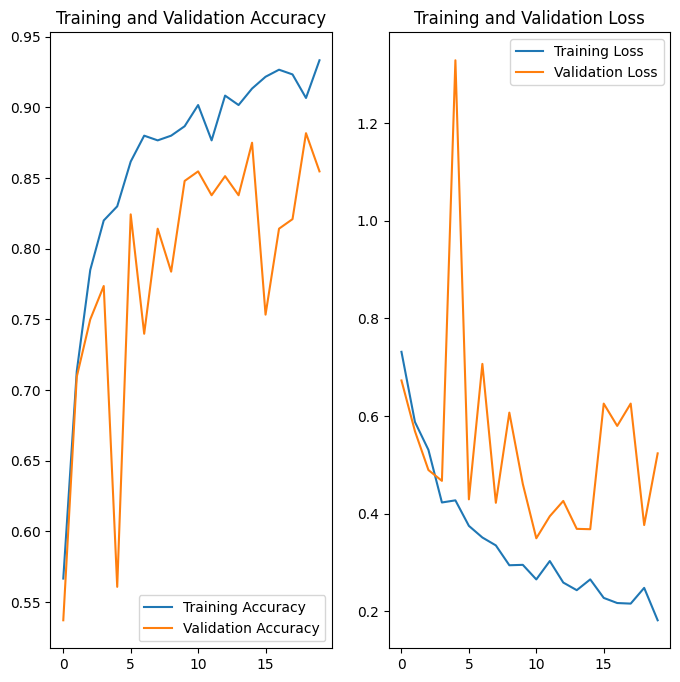

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Step 11: Model Accuracy

In [32]:
x1 = model.evaluate(train_generator)
x2 = model.evaluate(validation_generator)

print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f'%(x1[1]*100,x1[0]))
print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f'%(x2[1]*100,x2[0]))

38/38 [==============================] - 2s 39ms/step - loss: 0.5274 - accuracy: 0.8500
Training Accuracy  : 95.67%     Training loss  : 0.130774
Validation Accuracy: 85.00%     Validation loss: 0.527395


## Classified the car 

### Step 1: Importing all the necessary libraries 

In [ ]:
from tensorflow import keras

from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np

import matplotlib.pyplot as plt
import cv2

### Step 2: Load the model 

In [ ]:
model=load_model('model_saved.h5')

### Step 3: Setup the test image 

In [ ]:
image = load_img('dataset/test/royce.jpg', target_size=(224, 224))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,224,224,3)
label = model.predict(img)
print("Predicted Class (0 - EV , 1- nonEV): ", label[0][0])

### Step 4: The Result